
**IBM Naan Mudhalvan - Artificial Intelligence**

**Market Basket Analysis**

In [ ]:
#packages import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from mlxtend.frequent_patterns import apriori

In [ ]:
#Read the Data
dataset = pd.read_excel("/content/drive/MyDrive/Market_basket_analysis.xlsx")
dataset.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Data Preparation**

In [ ]:
#Data Cleaning
dataset['Description'] = dataset['Itemname'].str.strip()
dataset.dropna(axis=0, subset=['BillNo'], inplace=True)
dataset['BillNo'] = dataset['BillNo'].astype('str')
dataset=dataset[~dataset['BillNo'].str.contains('C')]
dataset.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.


In [ ]:
dataset['Country'].value_counts()


United Kingdom          487622
Germany                   9042
France                    8408
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Sweden                     451
Unspecified                446
Austria                    398
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Greece                     145
Malta                      112
United Arab Emirates        68
RSA                         58
Lebanon                     45
Lithuania                   35
Brazil                      32
Bahrain                     18
Saudi Arabia                 9
Name: Country, dtype: int64

In [ ]:
dataset.shape


(522064, 8)

In [ ]:
#Viewing transaction basket
mybasket = (dataset[dataset['Country'] == "Germany"]).groupby(['BillNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('BillNo')

In [ ]:
mybasket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
BillNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Converting all +ve values to 1 & everything else to 0
def my_encode_units(x):
  if x <=0:
    return 0
  if x >=1:
    return 1

mybasket_sets = mybasket.applymap(my_encode_units)
mybasket_sets.drop('POSTAGE', inplace=True, axis=1)

**Training Model**

In [ ]:
#Frequent itemsets
my_frequent_items = apriori(my_basket_sets, min_support=0.07, use_colnames=True)

In [ ]:
#generating rules
from mlxtend.frequent_patterns.association_rules import association_rules
my_rules = association_rules(my_frequent_items, metric='lift', min_threshold=1)

In [ ]:
#viewing top 100 rules
my_rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(6 RIBBONS RUSTIC CHARM),(POSTAGE),0.102845,0.818381,0.091904,0.893617,1.091933,0.007738,1.707221,0.093844
1,(POSTAGE),(6 RIBBONS RUSTIC CHARM),0.818381,0.102845,0.091904,0.112299,1.091933,0.007738,1.010651,0.463569
2,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.100656,0.818381,0.087527,0.869565,1.062544,0.005152,1.392414,0.065450
3,(POSTAGE),(JUMBO BAG WOODLAND ANIMALS),0.818381,0.100656,0.087527,0.106952,1.062544,0.005152,1.007049,0.324096
4,(PLASTERS IN TIN CIRCUS PARADE),(POSTAGE),0.115974,0.818381,0.100656,0.867925,1.060539,0.005746,1.375117,0.064572
5,(POSTAGE),(PLASTERS IN TIN CIRCUS PARADE),0.818381,0.115974,0.100656,0.122995,1.060539,0.005746,1.008006,0.314301
6,(PLASTERS IN TIN SPACEBOY),(POSTAGE),0.107221,0.818381,0.100656,0.938776,1.147113,0.012909,2.966448,0.143649
7,(POSTAGE),(PLASTERS IN TIN SPACEBOY),0.818381,0.107221,0.100656,0.122995,1.147113,0.012909,1.017986,0.706129
8,(PLASTERS IN TIN WOODLAND ANIMALS),(POSTAGE),0.137856,0.818381,0.118162,0.857143,1.047364,0.005344,1.271335,0.052453
9,(POSTAGE),(PLASTERS IN TIN WOODLAND ANIMALS),0.818381,0.137856,0.118162,0.144385,1.047364,0.005344,1.007631,0.248996


**Marketing Recommendations**

In [ ]:
my_basket_sets['ROUND SNACK BOXES SET OF4 WOODLAND'].sum()

112

In [ ]:
my_basket_sets['SPACEBOY LUNCH BOX'].sum()

47

In [ ]:
#condition based rules filteration
my_rules[(my_rules['lift'] >= 3) & (my_rules['confidence'] >= 0.3)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509,0.935072
25,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540,0.837922
29,"(ROUND SNACK BOXES SET OF4 WOODLAND, POSTAGE)",(ROUND SNACK BOXES SET OF 4 FRUITS),0.225383,0.157549,0.124726,0.553398,3.512540,0.089218,1.886357,0.923431
30,"(ROUND SNACK BOXES SET OF 4 FRUITS, POSTAGE)",(ROUND SNACK BOXES SET OF4 WOODLAND),0.150985,0.245077,0.124726,0.826087,3.370730,0.087724,4.340810,0.828405
31,(ROUND SNACK BOXES SET OF4 WOODLAND),"(ROUND SNACK BOXES SET OF 4 FRUITS, POSTAGE)",0.245077,0.150985,0.124726,0.508929,3.370730,0.087724,1.728904,0.931655
32,(ROUND SNACK BOXES SET OF 4 FRUITS),"(ROUND SNACK BOXES SET OF4 WOODLAND, POSTAGE)",0.157549,0.225383,0.124726,0.791667,3.512540,0.089218,3.718162,0.849077


**Visualization of Dataset**

<Axes: xlabel='Price', ylabel='Quantity'>

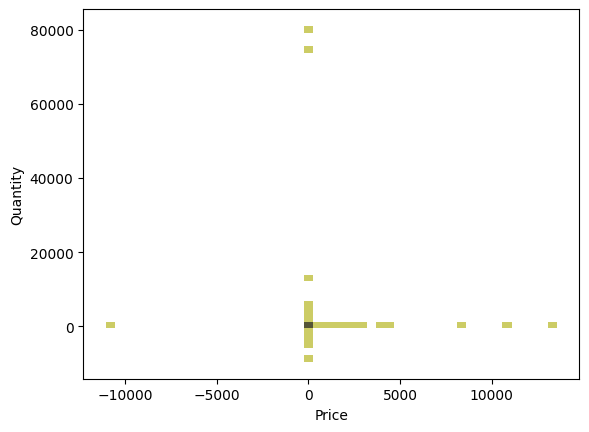

In [ ]:
sns.histplot(dataset, x='Price', y='Quantity', bins=50, color='y')

<Axes: xlabel='Price'>

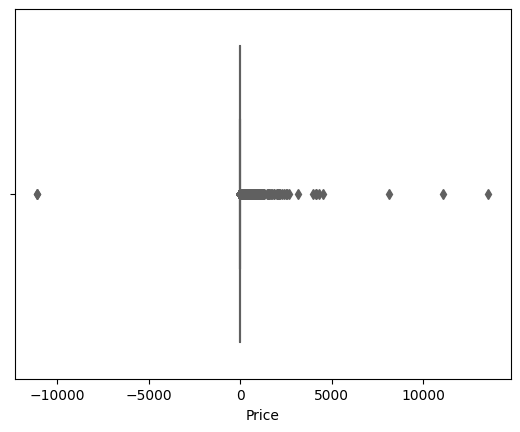

In [ ]:
sns.boxplot(dataset, x='Price',  palette='Blues')

<Figure size 1200x800 with 0 Axes>

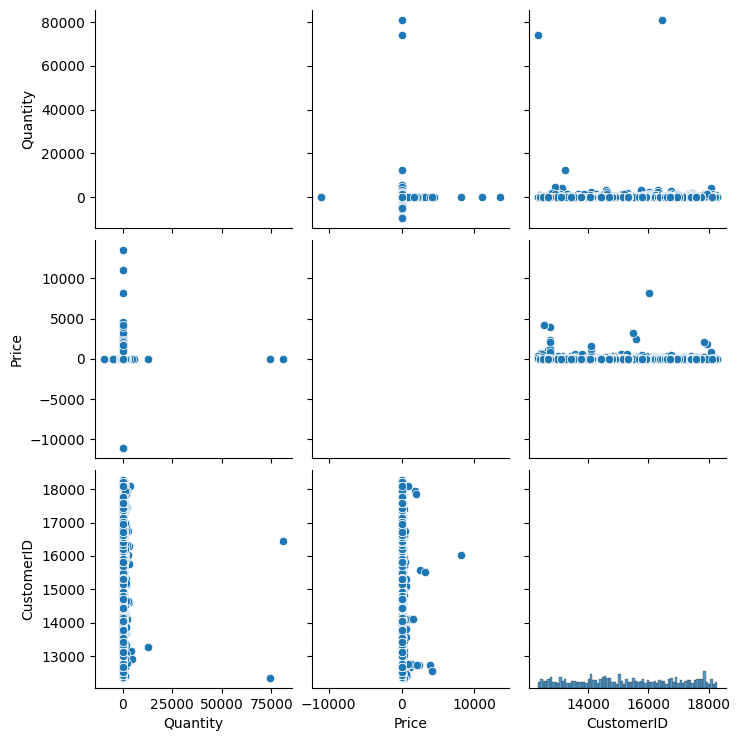

In [ ]:
plt.figure(figsize=(12,8))
sns.pairplot(dataset)

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'CustomerID'}>]], dtype=object)

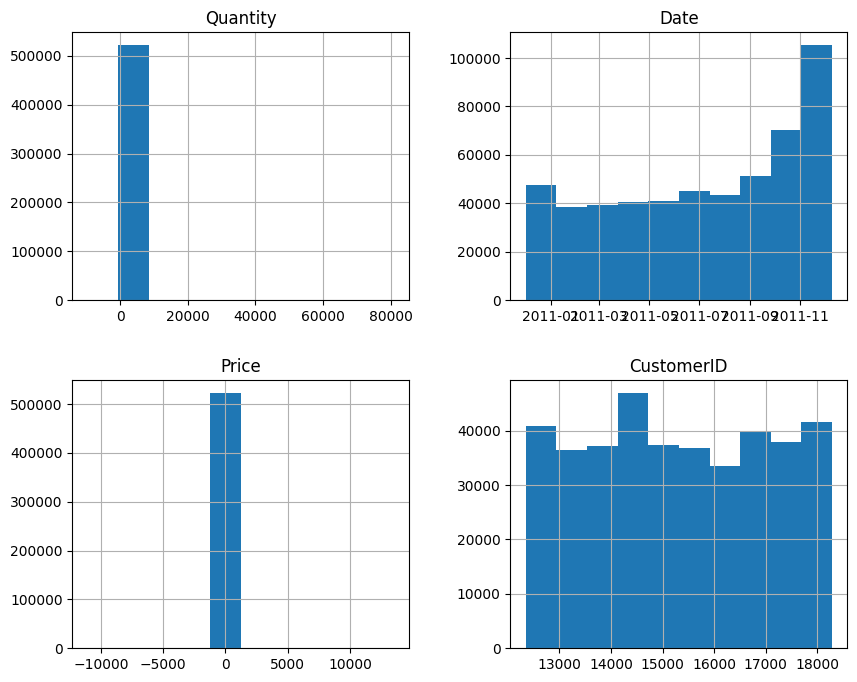

In [ ]:
dataset.hist(figsize=(10,8))

**Visualizing Correlation**

In [ ]:
dataset.corr()

<ipython-input-48-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Quantity,Price,CustomerID
Quantity,1.000000,-0.002803,-0.005990
Price,-0.002803,1.000000,-0.010245
CustomerID,-0.005990,-0.010245,1.000000


<ipython-input-49-1afac6b5cf53>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True)


<Axes: >

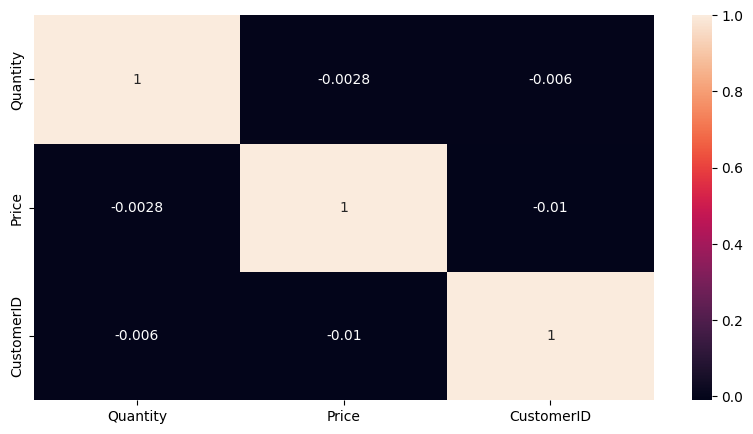

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(), annot=True)